# Neural network model
`Keras` implementation

For visualisation sake: [here](https://seaborn.pydata.org/tutorial/distributions.html, "seaborn") there is info about bandwidth. And some aesthetic visualisation trick [here](https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08)

In [26]:
def plotter(params_vect, num_layers, plot_hist = True):
    
    if (plot_hist == True):
        
        for i in range(numLayers):
            
            plt.figure(figsize=(18,6))
            # weights at params_vect[i], i = 0,2,4,..
            plt.subplot(1,2,1)
            j = 2*i
            weights = params_vect[j].flatten()
            sns.distplot(weights, rug=True, kde=False, norm_hist=False)
            title = "Weights frequencies of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Weight")
            plt.ylabel("Frequency")

            # biases OTOH at params_vect[i], i = 1,3,5,..
            plt.subplot(1,2,2)
            j = 2*i + 1
            biases = params_vect[j].flatten()
            sns.distplot(biases, rug=True, kde=False, norm_hist=False)
            title = "Biases frequencies of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Bias")
            plt.ylabel("Frequency")
        plt.show()
        
    else:
        
        
        for i in range(numLayers):
            
            plt.figure(figsize=(18,6))
            plt.subplot(1,2,1)
            j = 2*i
            weights = params_vect[j].flatten()
            bandwdth = 1.06 * weights.std() * weights.size ** (-1 / 5.)
            lgnd = "Bandwidth " + '%.2f' % bandwidth
            sns.kdeplot(weights, bw=bandwidth, shade=True, label = lgnd)
            title = "Weights distribution of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Weight")
            plt.ylabel("Pdf")

            plt.subplot(1,2,2)
            j = 2*i + 1
            biases = params_vect[j].flatten()
            bandwdth = 1.06 * wghs.std() * wghs.size ** (-1 / 5.)
            lgnd = "Bandwidth " + '%.2f' % bandwidth
            sns.kdeplot(biases, bw=bandwidth, shade=True, label = lgnd)
            title = "Biases distribution of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Bias")
            plt.ylabel("Pdf")
        plt.show()
#enddef

def jointPlotter(numLayers, params_pre, params_post, plot_hist = True):
    
    if (plot_hist == True):
        
        for i in range(numLayers):
    
            j = 2*i
            # as before: weights on the even slots
            fig = plt.figure(figsize=(18,6))
            plt.subplot(1,2,1)
            w1 = params_pre[j].flatten()
            w2 = params_post[j].flatten()
            sns.distplot(w1, rug=False, kde=False, norm_hist=False, label = "Weights before train")
            sns.distplot(w2, rug=False, kde=False, norm_hist=False, label = "Weights after train")
            title = "Weights frequencies of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Weight")
            plt.ylabel("Frequency")
            plt.legend()

            j = 2*i + 1
            # and biases on odd slots
            plt.subplot(1,2,2)
            b1 = params_pre[j].flatten()
            b2 = params_post[j].flatten()
            sns.distplot(b1, rug=False, kde=False, norm_hist=False, label = "Biases before train")
            sns.distplot(b2, rug=False, kde=False, norm_hist=False, label = "Biases after train")
            title = "Biases frequencies of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Bias")
            plt.ylabel("Frequency")
            plt.legend()
        plt.show()

    else:
            
        for i in range(numLayers):
    
            j = 2*i
            fig = plt.figure(figsize=(18,6))
            plt.subplot(1,2,1)
            w1 = params_pre[j].flatten()
            bandwidth = 1.06 * w1.std() * w1.size ** (-1 / 5.)
            lgnd = "Bandwidth " + '%.2f' % bandwidth
            sns.kdeplot(w1, bw=bandwidth, shade=True, label = "Weights before train")

            w2 = params_post[j].flatten()
            bandwidth = 1.06 * w2.std() * w2.size ** (-1 / 5.)
            lgnd = "Bandwidth " + '%.2f' % bandwidth
            sns.kdeplot(w2, bw=bandwidth, shade=True, label = "Weights after train")
            title = "Weights distribution of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Weight")
            plt.ylabel("Pdf")
            plt.legend()

            j = 2*i + 1
            plt.subplot(1,2,2)
            b1 = params_pre[j].flatten()
            bandwidth = 1.06 * b1.std() * b1.size ** (-1 / 5.)
            lgnd = "Bandwidth " + '%.2f' % bandwidth
            sns.kdeplot(b1, bw=bandwidth, shade=True, label = "Biases before train")

            b2 = params_post[j].flatten()
            bandwidth = 1.06 * b2.std() * b2.size ** (-1 / 5.)
            lgnd = "Bandwidth " + '%.2f' % bandwidth
            sns.kdeplot(b2, bw=bandwidth, shade=True, label = "Biases after train")
            plt.legend()
            title = "Bias distribution of layer "+str(i+1)
            plt.title(title,fontsize=20)
            plt.xlabel("Bias")
            plt.ylabel("Pdf")
        plt.show()
#enddef

In [10]:

from math import floor

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1
from keras.initializers import RandomNormal, Orthogonal

# note: RandomNormal(mean = 0.0, stddev = 0.05, seed = None)
#       Orthogonal(gain = 1.0, seed = None)

from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

from scipy import stats
import numpy as np

import pickle

In [19]:
dataSet_clean = False

if (dataSet_clean == True):
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_clean.pkl', 'rb')
else:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_noised.pkl', 'rb')
#end

DataSet = pickle.load(fileID)
fileID.close()

X = DataSet[0]
Y = DataSet[1]

print(type(X)," Dim: ",X.shape,"\n",X)
print(type(Y)," Dim: ",Y.shape,"\n",Y)
print("\n")

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 20)

print("X: train dims = {}, test dims = {}\n".format(Xtrain.shape, Xtest.shape))
print("Y: train dims = {}, test dims = {}\n".format(Ytrain.shape, Ytest.shape))

M = Xtrain.shape[1]
nCat = Ytrain.shape[1]

<class 'numpy.ndarray'>  Dim:  (2000, 31) 
 [[ 1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1.  1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]]
<class 'numpy.ndarray'>  Dim:  (2000, 4) 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


X: train dims = (1400, 31), test dims = (600, 31)

Y: train dims = (1400, 4), test dims = (600, 4)



In [12]:
%%time
model = Sequential()

normal_init = RandomNormal(mean = 0.0, stddev = 0.05, seed = None)
#orth_init = Orthogonal(gain = 1.0, seed = None)

model.add(Dense(input_dim = M, units = 20,
                kernel_initializer = Orthogonal(gain = 1.0, seed = None),
                bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
                activation = 'relu'))
model.add(Dense(input_dim = M, units = 10,
                kernel_initializer = Orthogonal(gain = 1.0, seed = None),
                bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
                activation = 'relu'))
model.add(Dense(units = nCat,
                kernel_initializer = Orthogonal(gain = 1.0, seed = None),
                bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
                activation = 'softmax'))

weights_pre = np.asarray(model.get_weights())
numLayers = len(model.layers)

Instructions for updating:
Colocations handled automatically by placer.
Wall time: 5.06 s


In [13]:
fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_init.pkl', 'wb')
pickle.dump(weights_pre, fileID)
fileID.close()

In [ ]:
plotter(weights_pre, numLayers, plot_hist = False)
plotter(weights_pre, numLayers, plot_hist = True)

Train on 1260 samples, validate on 140 samples
Epoch 1/100
1260/1260 [==============================] - 3s 3ms/step - loss: 1.3946 - acc: 0.5722 - val_loss: 0.7991 - val_acc: 0.6357
Epoch 2/100
1260/1260 [==============================] - 0s 289us/step - loss: 0.6770 - acc: 0.7135 - val_loss: 0.5557 - val_acc: 0.7143
Epoch 3/100
1260/1260 [==============================] - 0s 273us/step - loss: 0.5168 - acc: 0.7921 - val_loss: 0.4489 - val_acc: 0.8214
Epoch 4/100
1260/1260 [==============================] - 0s 298us/step - loss: 0.4291 - acc: 0.8651 - val_loss: 0.3740 - val_acc: 0.8786
Epoch 5/100
1260/1260 [==============================] - 0s 298us/step - loss: 0.3696 - acc: 0.8873 - val_loss: 0.3285 - val_acc: 0.9000
Epoch 6/100
1260/1260 [==============================] - 1s 905us/step - loss: 0.3288 - acc: 0.9000 - val_loss: 0.2900 - val_acc: 0.9071
Epoch 7/100
1260/1260 [==============================] - 0s 372us/step - loss: 0.3011 - acc: 0.9071 - val_loss: 0.2743 - val_acc: 0.9

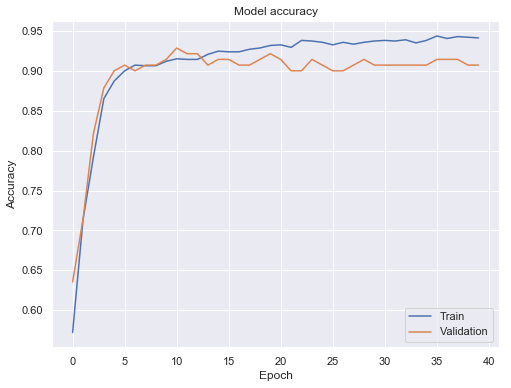

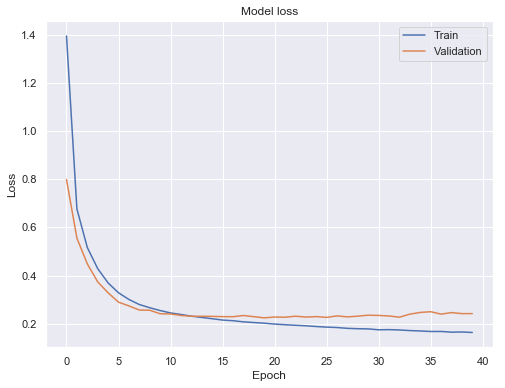

600/600 [==============================] - 0s 266us/step
Model evaluation on test data: loss and accuracy
 [0.2283755882581075, 0.9133333333333333]


In [20]:
es1 = EarlyStopping(monitor='val_acc', mode='auto', patience = 30, verbose = 1)
es2 = EarlyStopping(monitor='val_loss', mode='auto',patience = 20, verbose = 1)

sgd = keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.6, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(Xtrain, Ytrain, validation_split = 0.1, epochs = 100, verbose = 1, callbacks = [es1,es2])


plt.figure(figsize=(8,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


print("Model evaluation on test data: loss and accuracy\n",model.evaluate(Xtest,Ytest, verbose = 1))

# Weights distributions

In [21]:
weights_post = np.asarray(model.get_weights())

In [29]:
dataSet_clean = True

In [22]:
if dataSet_clean == True:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_clean.pkl', 'wb')
    pickle.dump(weights_post, fileID)
    fileID.close()
else:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_noisy.pkl', 'wb')
    pickle.dump(weights_post, fileID)
    fileID.close()

In [30]:
if dataSet_clean == True:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_clean.pkl', 'rb')
    weights_post = pickle.load(fileID)
    fileID.close()
else:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_noisy.pkl', 'rb')
    weights_post = pickle.load(fileID)
    fileID.close()

In [ ]:
# weights is a 4 entry list.
# weights[0] is the  weights matrix of the input -> hidden layer
# weights[1] is the bias vector of the input -> hidden layer
# weights[2] is the  weights matrix of the hidden -> output layer
# weights[3] is the bias vector of the hidden -> output layer
numLayers = len(model.layers)

plotter(weights_post, numLayers, plot_hist = True)

In [ ]:

plotter(weights_post, numLayers, plot_hist = False)

## Some further refinement

Perhaps is not strictly necessary pass trhough KDE and distribution fitting, it could suffice to superpose the histograms to check the (dis)similarity between parameters distributions before and after the training process.

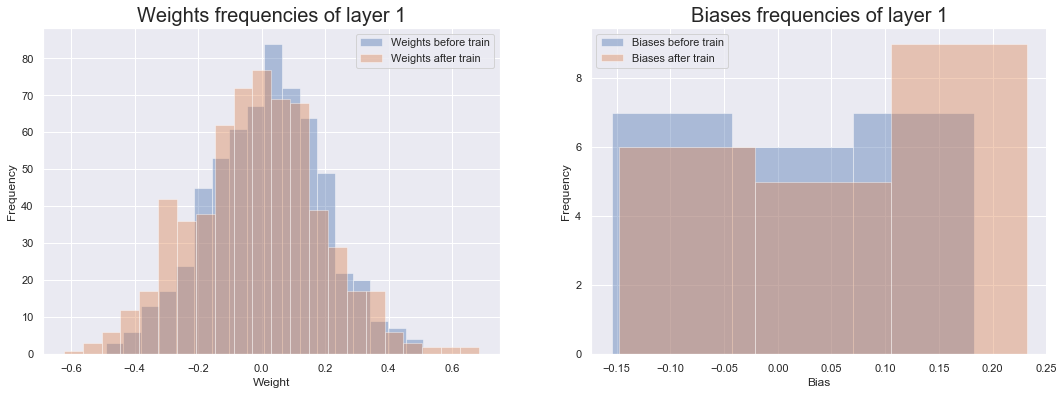

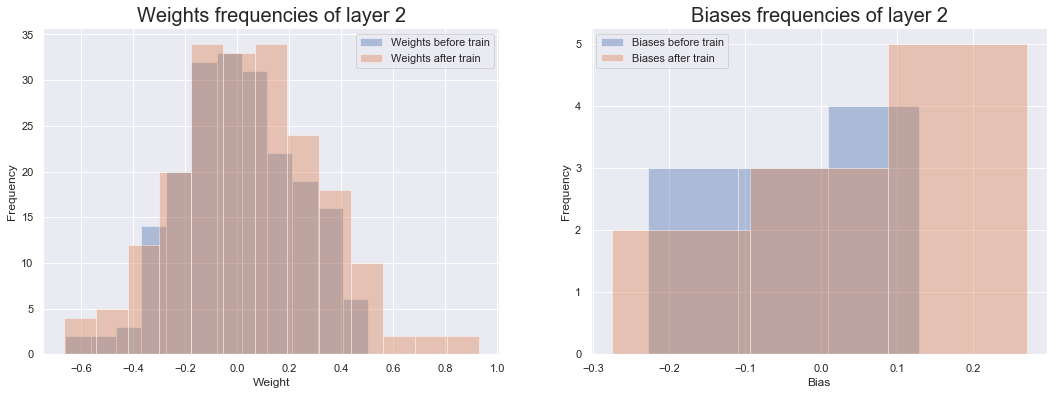

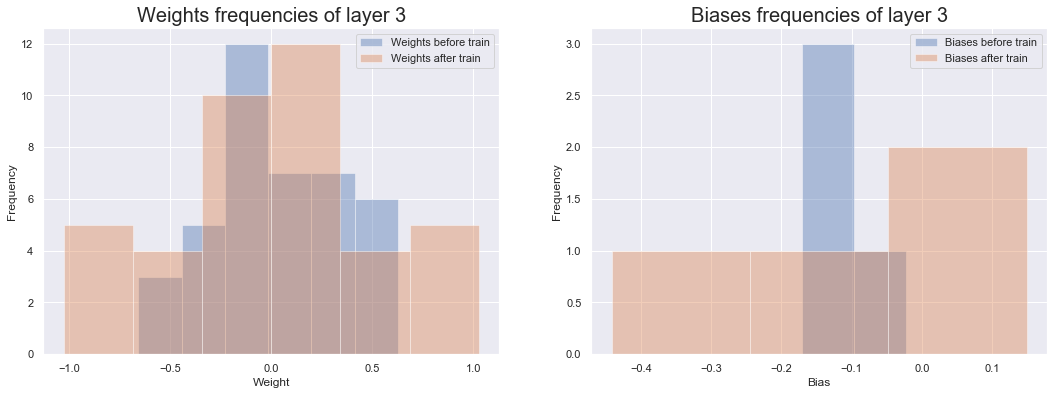

In [23]:
jointPlotter(numLayers, weights_pre, weights_post, plot_hist = True)

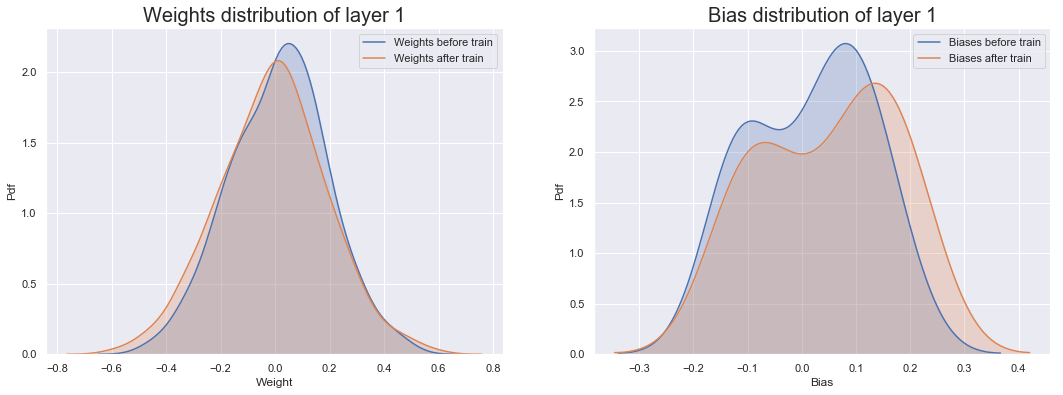

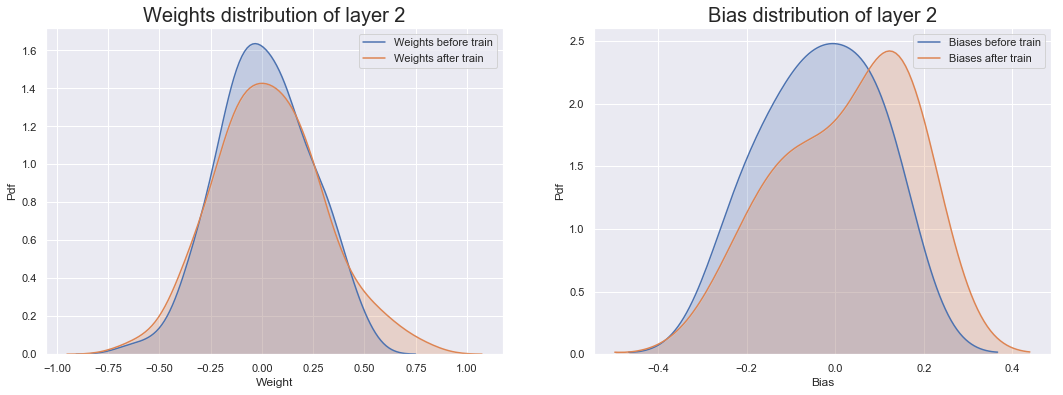

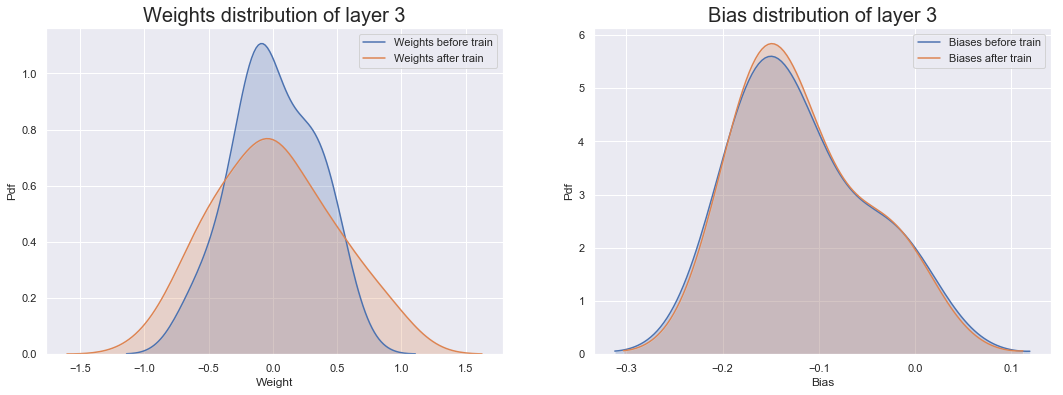

In [31]:
jointPlotter(numLayers, weights_pre, weights_post, plot_hist = False)